Materials by : Andi-Nov<br>
Coded by : sammyon7

In [ ]:
# Load libraries!
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt # For plotting
import graphviz # For decision tree visualization!

In [ ]:
# Load dataset!
df = pd.read_csv('dataset_data.csv')
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,university,0,0,0,0,1
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,graduate school,1,0,0,0,0
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,graduate school,1,0,0,0,0
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,university,0,0,0,0,1
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,high school,0,1,0,0,0
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,high school,0,1,0,0,0


In [ ]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

Now the features are prepared for our usage. Next, we will make some imports from scikit-learn. We want to make a train/test split, which we are already familiar with. We also want to import the decision tree class.

In [ ]:
# Use sklearn to split and use tree package
from sklearn.model_selection import train_test_split
from sklearn import tree

# Here, split!
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

The tree library is the library of decision tree-related classes in scikit-learn. <br>
Instantiate the decision tree class by specifying the max_depth parameter to be 2

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [ ]:
# Use this code to fit the decision tree model and grow the tree
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Here, we've specified a number of options to the .export_graphviz method. First, we need to say which trained model we'd like to graph, which we've got in the dt object. Next, we say we don't want an output file: out_file=None. Instead, we provide the dot_data variable to hold the output of this method. The rest of the options are used as follows:
1. filled=True -> Each node will be filled with a color.
2. rounded=True -> The nodes will appear with rounded edges as opposed to rectangles.
3. feature_names=features_response[:-1] -> The names of the features from our list will be used as opposed to generic names such as X[0].
4. proportion=True -> The proportion of samples in each node will be displayed (we'll discuss this more later).
5. class_names=['Not defaulted', 'Defaulted'] -> The name of the predicted class will be displayed for each node.

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None,
                                filled=True, rounded=True,
                                feature_names=features_response[:-1],
                                proportion=True, class_names=['Not defaulted', 'Defaulted'])

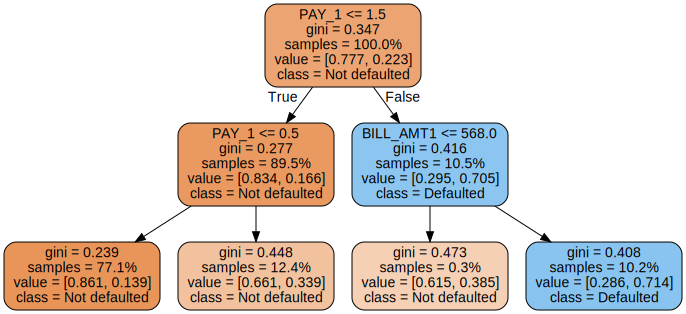

In [ ]:
# Use the .Source method of the graphviz package to create an image from dot_data and display it
graph = graphviz.Source(dot_data) 
graph

On the next line after the gini line, there is information about the proportion of samples in each node. In the top node, we are starting with all the samples ("samples = 100.0%"). Following the first split, 89.5% of the samples get sorted into the node on the left, while the remaining 10.5% go into the node on the right. This information is shown directly in the visualization and reflects how the training data was used to create the tree. Let's confirm this by examining the training data.<br>
To confirm the proportion of training samples where the PAY_1 feature is less than or equal to 1.5, first identify the index of this feature in the list of features_response[:-1] feature names

In [ ]:
features_response[:-1].index('PAY_1')

4

In [ ]:
X_train.shape

(21331, 17)

By applying a logical condition to the column of the training data corresponding to the PAY_1 feature, and then taking the sum of this, we calculated the number of samples meeting this condition. Then, by dividing by the total number of samples, we converted this to a proportion. We can see that the proportion we directly calculated from the training data is equal to the proportion displayed in the left node after the first split.<br>
After the first split, the samples contained in each of the two nodes on the first level are split again. As further splits are made beyond the first split, smaller and smaller proportions of the training data will be assigned to any given node in the subsequent levels of a branch.

In [ ]:
# Use this code to confirm the proportion of samples after the first split of the decision tree
sum(X_train[:,4] <= 1.5)/X_train.shape[0]

0.8946134733486475

In [ ]:
# Calculate the class fraction in the training set with this code
np.mean(y_train)

0.223102526838873

Here, we have shown a portion of the decision tree that is grown with the default options, which include max_depth=None, meaning no limitation on the depth of the tree. The entire tree is about twice as wide as the portion shown here. There are so many nodes that they only appear as very small orange or blue patches; the exact interpretation of each node is not important as we are just trying to illustrate how large trees can potentially be. It should be clear that without hyperparameters to govern the tree-growing process, extremely large and complex trees may result.

In [ ]:
dt.max_depth = None
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<b>TRAINING DECISION TREES : NODE IMPURITY</b><br><br>
Let's visualize the misclassification rate as a way to start thinking about how decision trees are trained. Programmatically, we consider possible class fractions, pm0, between 0.01 and 0.99 of the negative class, k = 0, in a node, m, using NumPy's linspace function.

In [ ]:
pm0 = np.linspace(0.01,0.99,99)
pm1 = 1 - pm0

In [ ]:
print("pm0 -> ",pm0)
print("pm1 -> ",pm1)

pm0 ->  [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99]
pm1 ->  [0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88 0.87 0.86
 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76 0.75 0.74 0.73 0.72
 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62 0.61 0.6  0.59 0.58
 0.57 0.56 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48 0.47 0.46 0.45 0.44
 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35 0.34 0.33 0.32 0.31 0.3
 0.29 0.28 0.27 0.26 0.25 0.24 0.23 0.22 0.21 0.2  0.19 0.18 0.17 0.16
 0.15 0.14 0.13 0.12 0.11 0.1  0.09 0.08 0.07 0.06 0.05 

Now, the misclassification rate for this node will be whatever the smaller class fraction is, between pm0 and pm1. We can find the smaller of the corresponding elements between two arrays with the same shape in NumPy by using the minimum function.<br>
What does the misclassification rate look like plotted against the possible class fractions of the negative class?

In [ ]:
misclassification_rate = np.minimum(pm0, pm1)
misclassification_rate

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.49, 0.48, 0.47, 0.46, 0.45,
       0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35, 0.34,
       0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23,
       0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12,
       0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01])

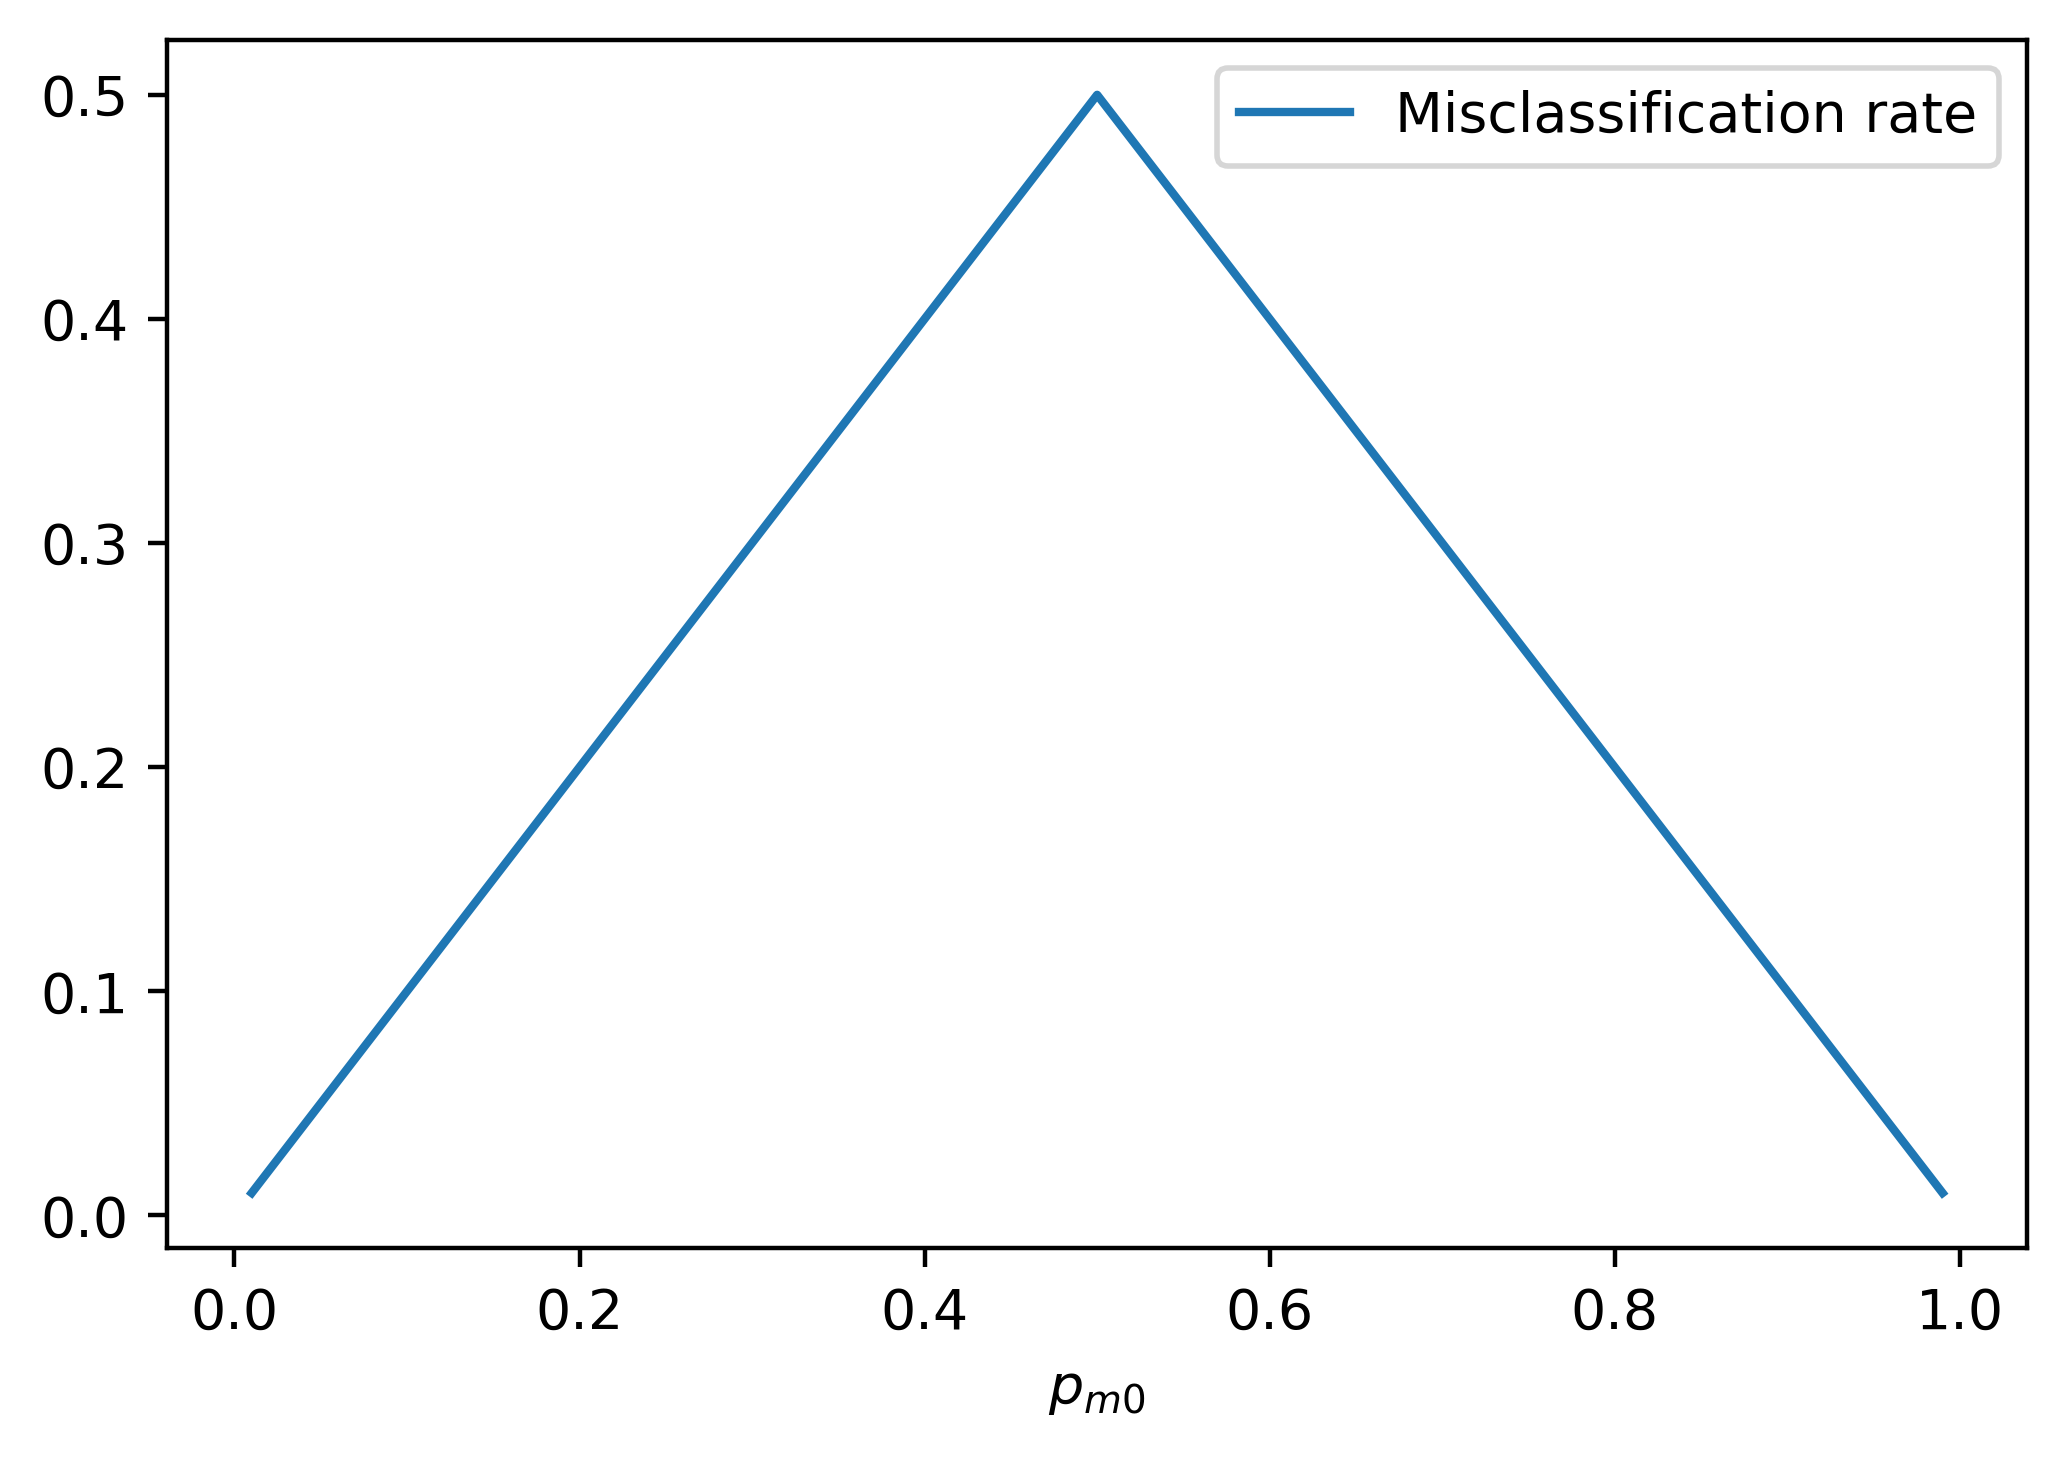

In [ ]:
# Now, plot!
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.xlabel('$p_{m0}$')
plt.legend()

Now, it's clear that the closer the class fraction of the negative class, pm0, is to 0 or 1, the lower the misclassification rate will be. How is this information used when growing decision trees? Consider the process that might be followed.<br>
Every time a node is split when growing a decision tree, two new nodes are created. Since the prediction from either of these new nodes is simply the majority class, an important goal will be to reduce the misclassification rate. Therefore, we will want to find a feature, from all the possible features, and a value of this feature at which to make a cut point, so that the misclassification rate in the two new nodes will be as low as possible when averaging over all the classes. This is very close to the actual process that is used to train decision trees.<br>
While the misclassification rate is an intuitive measure of impurity, it happens that there are better measures that can be used to find splits during the model training process. The two options that are available in scikit-learn for the impurity calculation, which you can specify with the criterion keyword argument, are the <b>Gini impurity</b> and the <b>cross-entropy</b> options. Here, we will describe these mathematically and show how they compare with the misclassification rate.

In [ ]:
# We can write this programmatically as follows!
gini = (pm0 * (1-pm0)) + (pm1 * (1-pm1)) # Gini impurity
cross_ent = -1*( (pm0 * np.log(pm0)) + (pm1 * np.log(pm1)) )# Cross entropy

In order to add the Gini impurity and cross entropy to our plot of misclassification rate and see how they compare, we just need to include the following lines of code, after we plot the misclassification rate

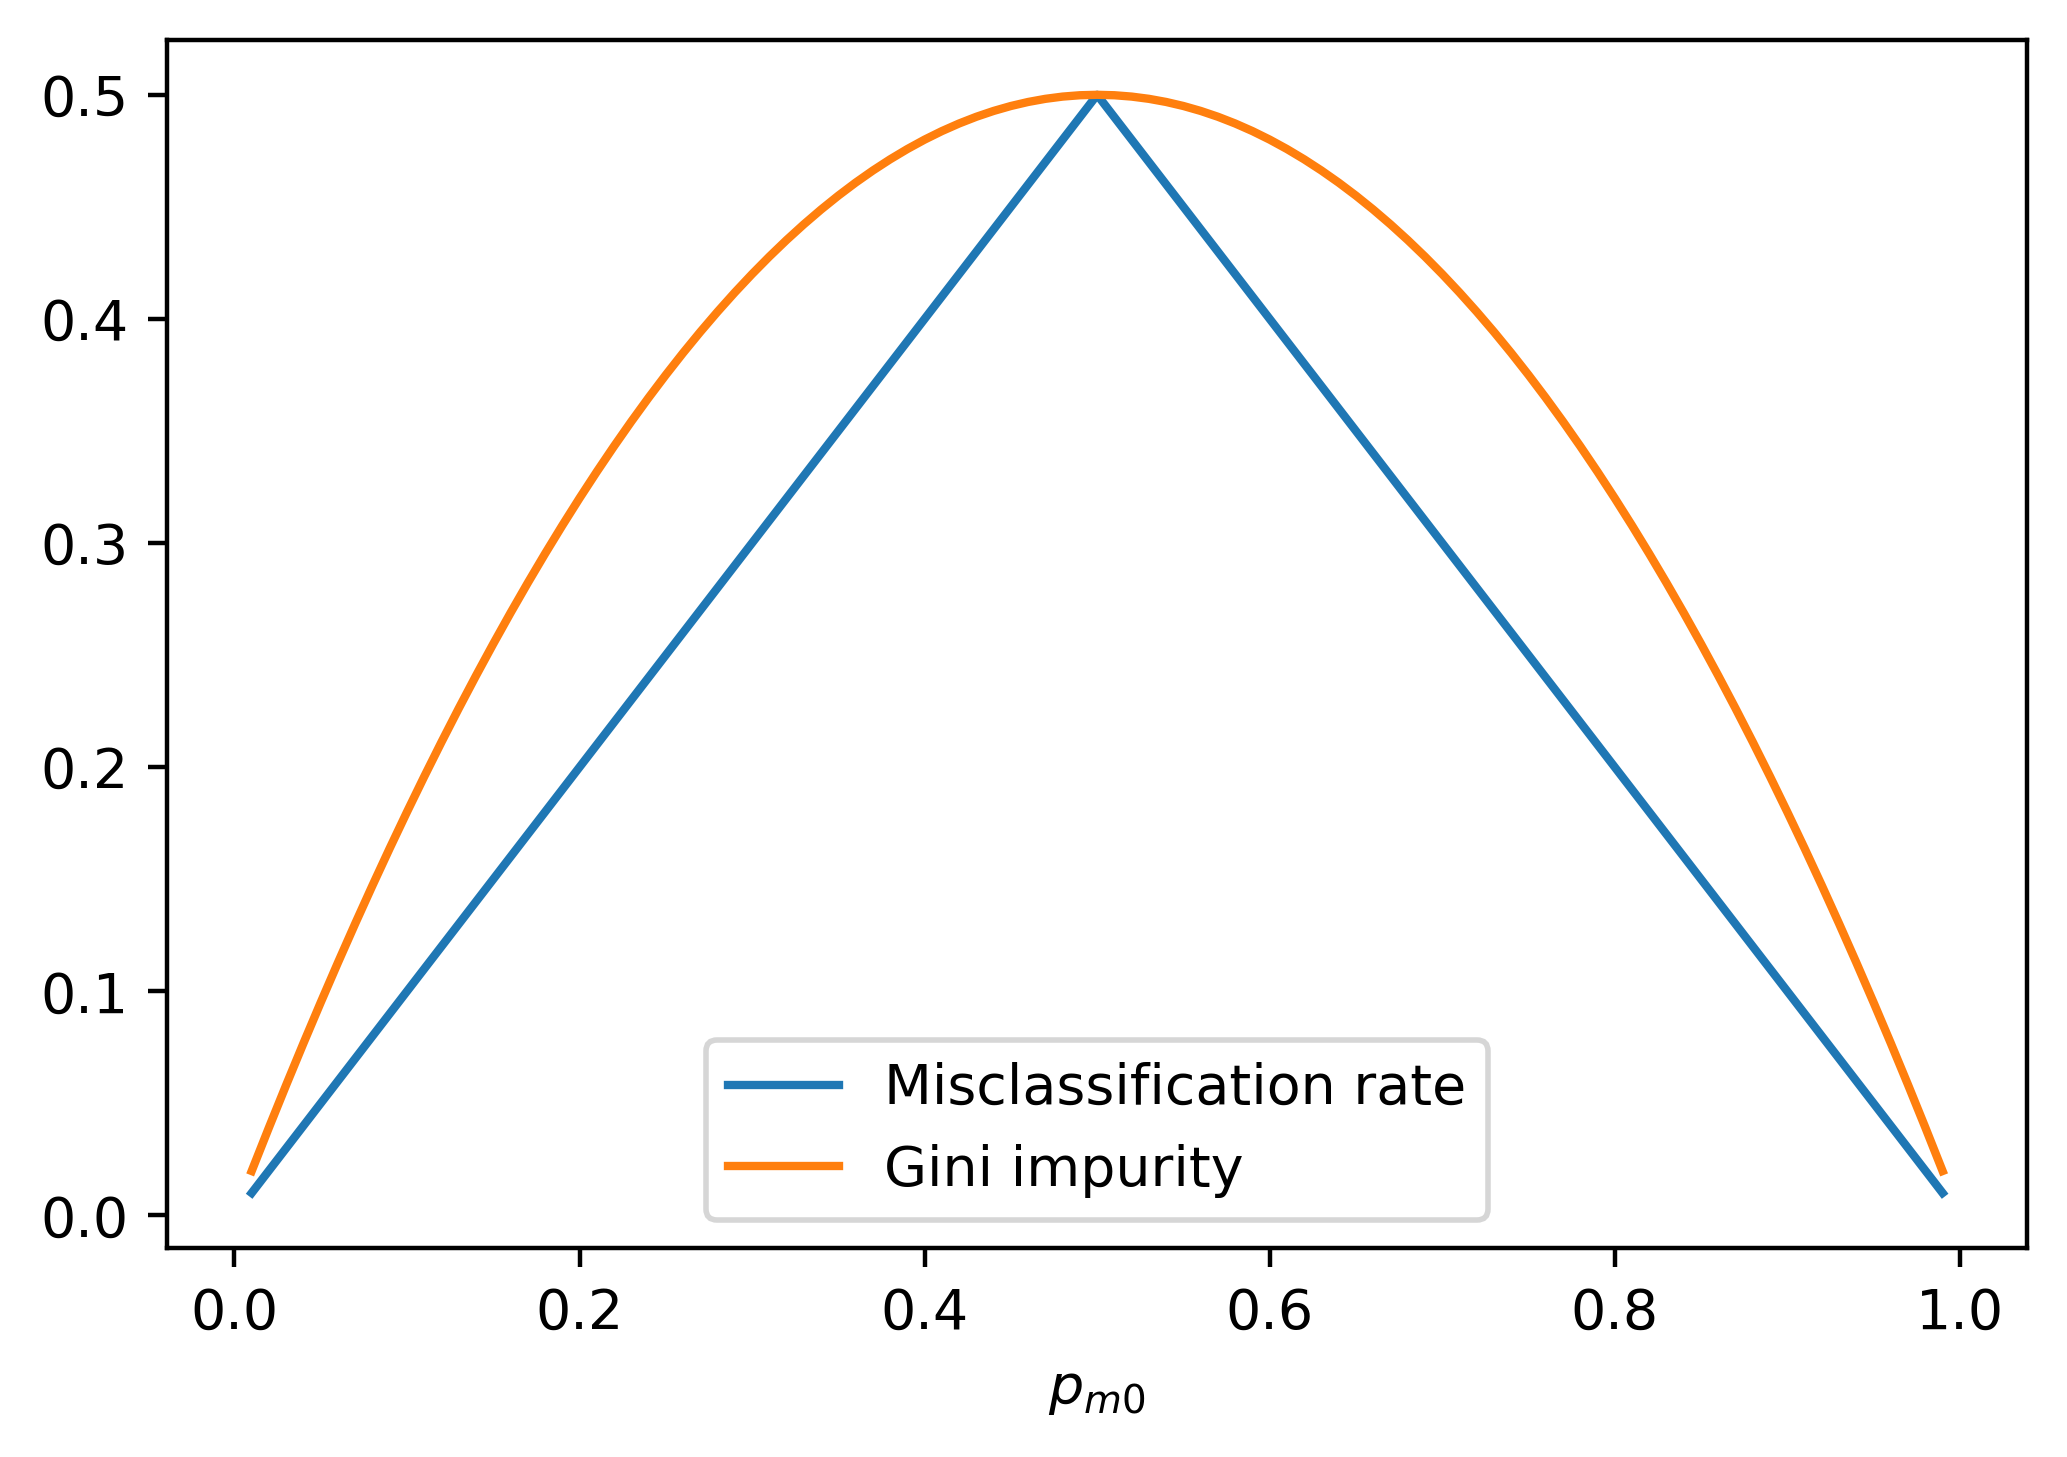

In [ ]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.plot(pm0, gini, label='Gini impurity')
plt.xlabel('$p_{m0}$')
plt.legend()

Like the misclassification rate, both the Gini impurity and the cross entropy are highest when the class fractions are equal at 0.5, and they decrease as the node becomes purer – in other words, when they contain a higher proportion of just one of the classes. However, the Gini impurity is somewhat steeper than the misclassification rate in certain regions of the class fraction, which enables it to more effectively find the best split. Cross-entropy looks yet steeper. So, which one is better for your work? This is the kind of question that does not have a concrete answer across all datasets. You should consider both impurity metrics in a cross-validation search for hyperparameters in order to determine the appropriate one. Note that in scikit-learn, Gini impurity can be specified with the criterion argument using the 'gini' string, while cross entropy is just referred to as 'entropy'.

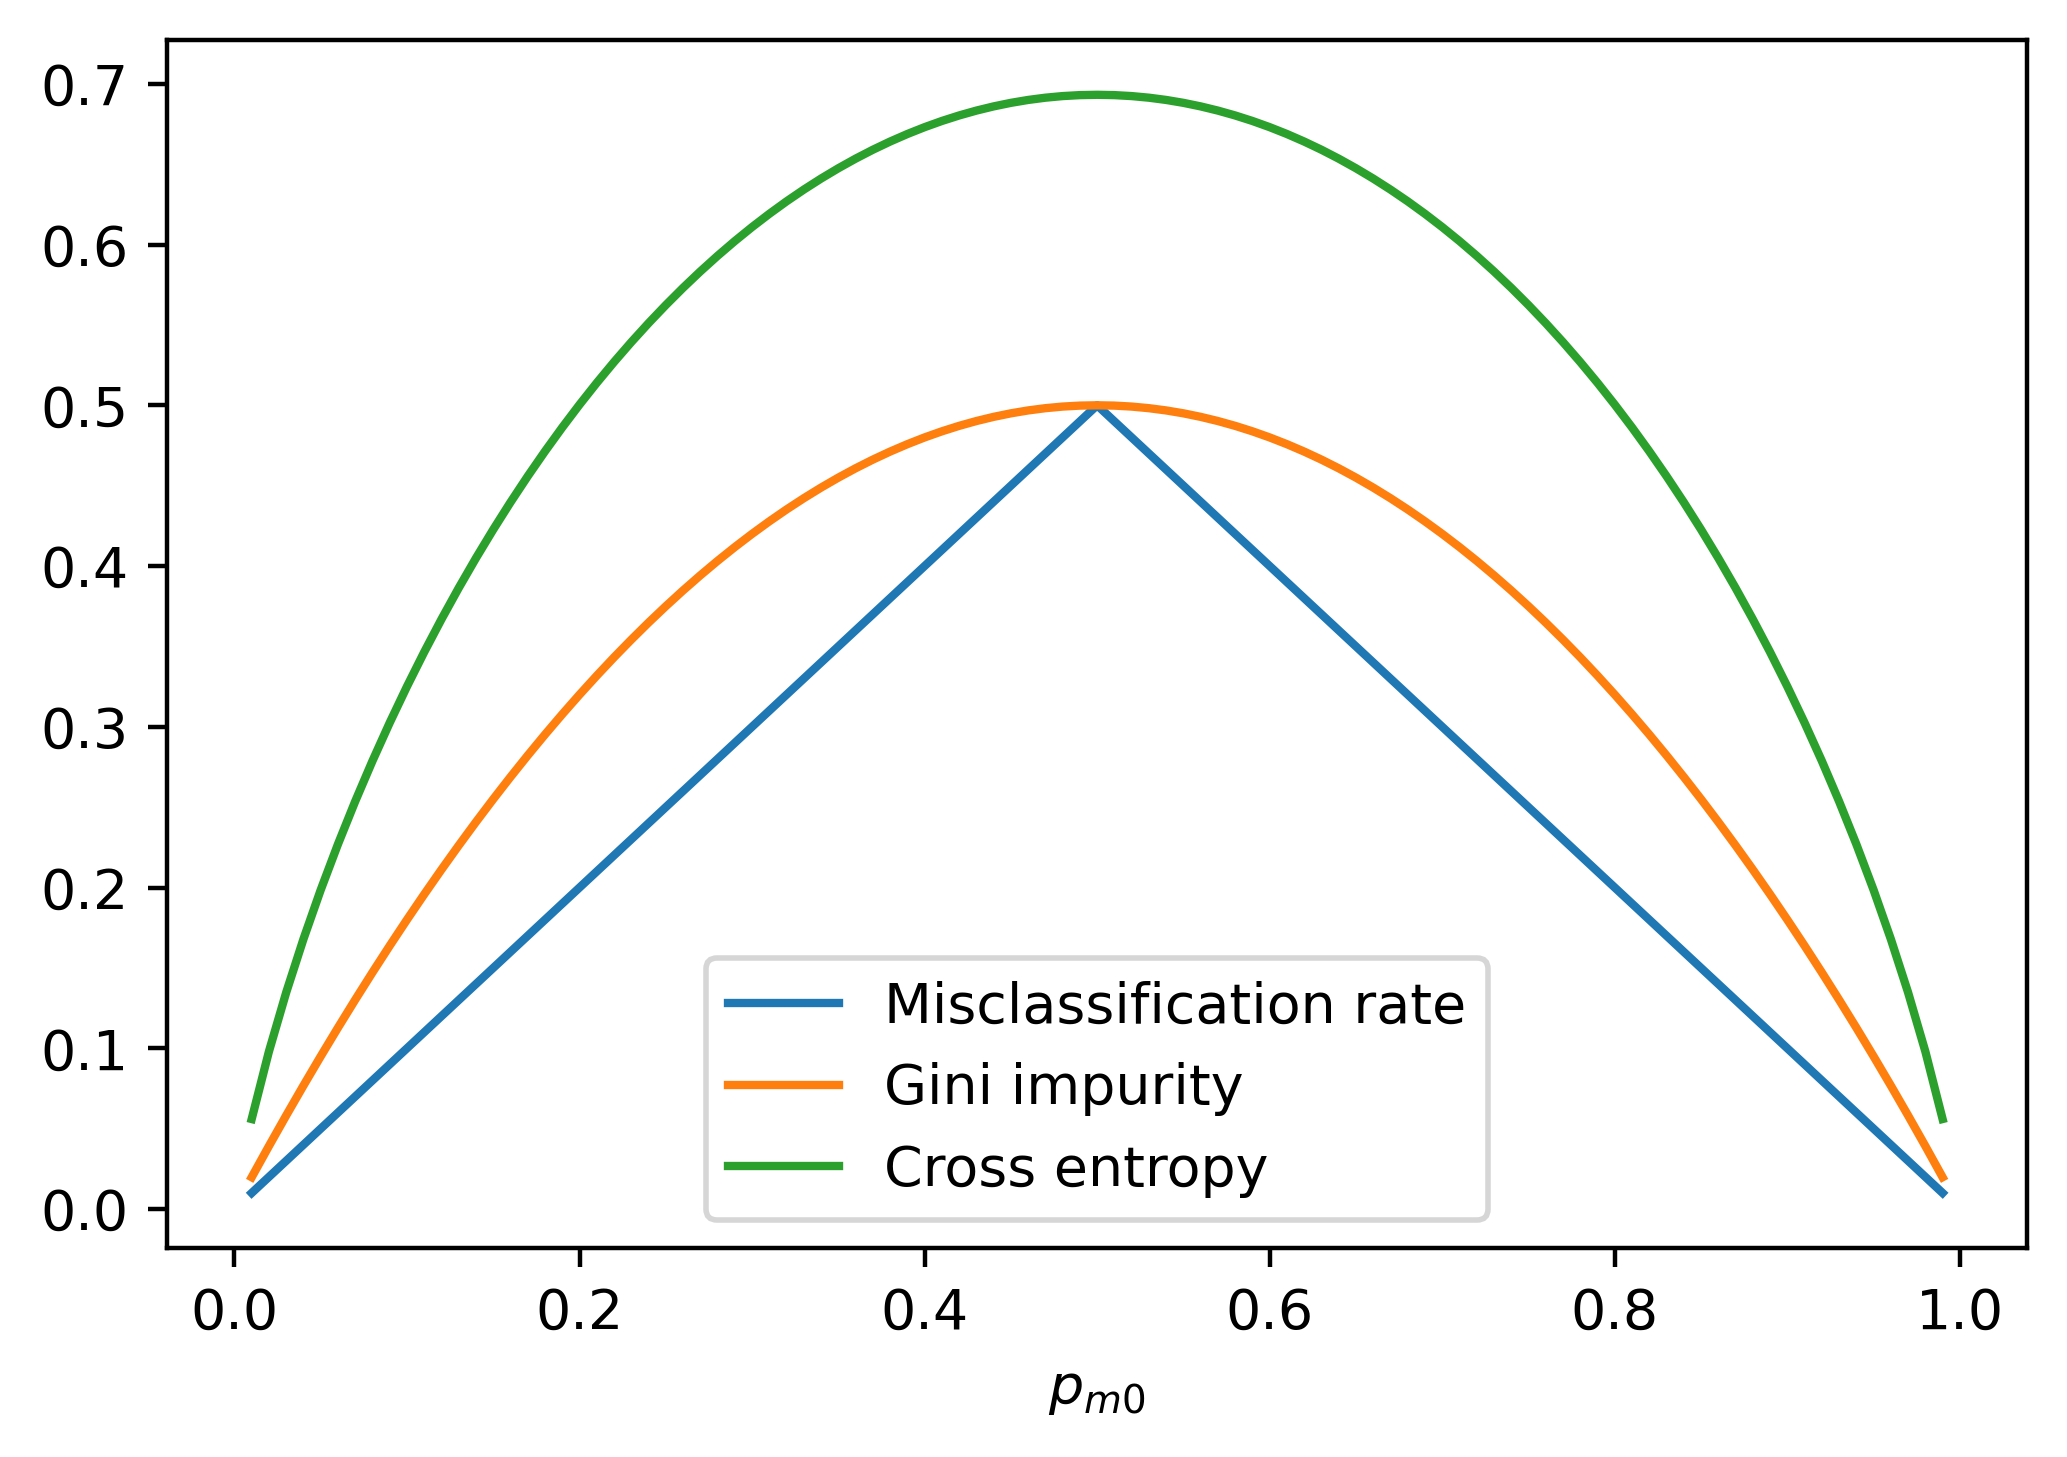

In [ ]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.plot(pm0, gini, label='Gini impurity')
plt.plot(pm0, cross_ent, label='Cross entropy')
plt.xlabel('$p_{m0}$')
plt.legend()

<b>Using Decision Trees: Advantages and Predicted Probabilities</b>

[]

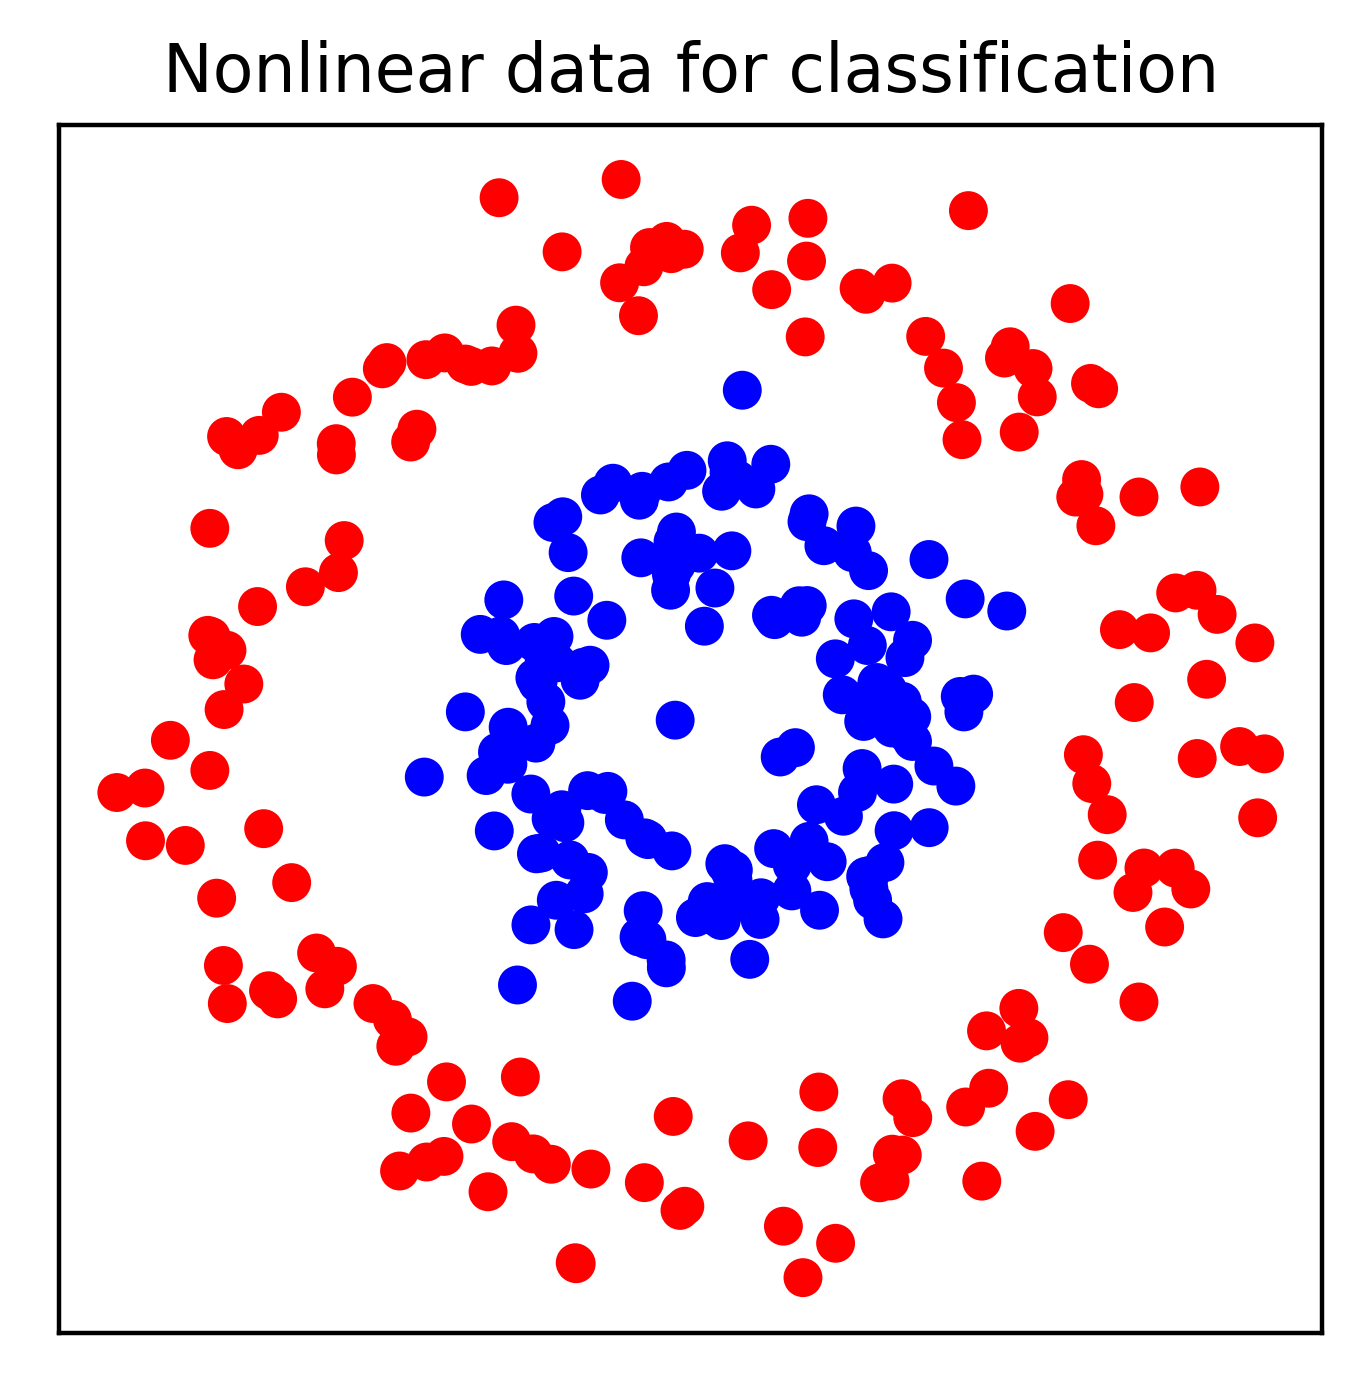

In [ ]:
# Non-linear relationships and interactions
from sklearn.datasets import make_circles
X_circ, y_circ = make_circles(n_samples = 300, shuffle=True,
                             noise=0.1, random_state=1, factor=0.4)
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.axes()
ax.scatter(X_circ[:,0], X_circ[:,1], c=y_circ, cmap=cm_bright)
ax.set_aspect('equal')
ax.set_title('Nonlinear data for classification')
ax.set_xticks([])
ax.set_yticks([])

Here, we plot in the background the predicted probabilities of class membership using red and blue colors, for both of these models

In [ ]:
# Use LogisticRegression pkg from sklearn!
from sklearn.linear_model import LogisticRegression

x_min, x_max = X_circ[:, 0].min() - .5, X_circ[:, 0].max() + .5
y_min, y_max = X_circ[:, 1].min() - .5, X_circ[:, 1].max() + .5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [ ]:
classifiers = [tree.DecisionTreeClassifier(max_depth=4, random_state=4),
              LogisticRegression()]
titles = ['Decision tree', 'Logistic regression']

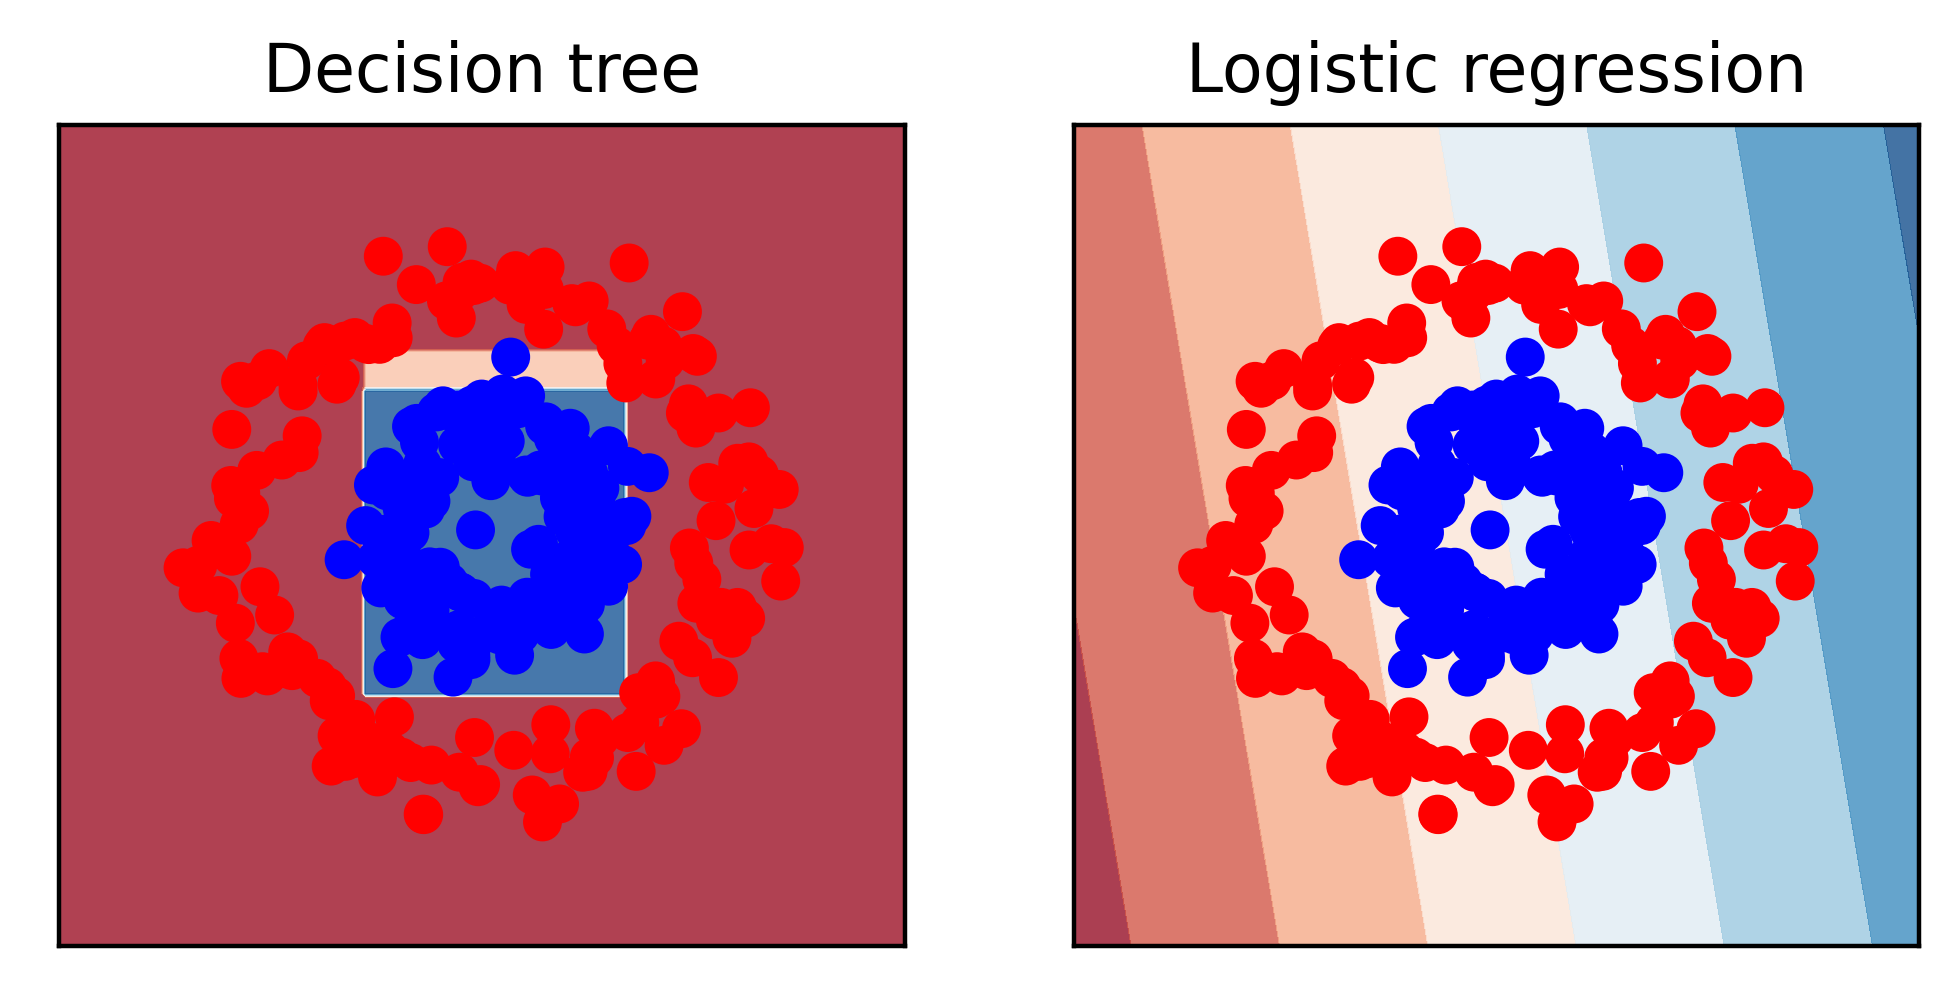

In [ ]:
counter = 1
for classif in classifiers:
    ax = plt.subplot(1, 2, counter)
    classif.fit(X_circ, y_circ)
    Z = classif.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    ax.scatter(X_circ[:,0], X_circ[:,1], c=y_circ, cmap=cm_bright)
    ax.set_aspect('equal')
    ax.set_title(titles[counter-1])
    ax.set_xticks([])
    ax.set_yticks([])
    counter+=1

The next step is to define the hyperparameters that we want to search using cross-validation. We will find the best maximum depth of tree, using the max_depth parameter. Deeper trees have more node splits, which partition the training set into smaller and smaller subspaces using the features. While we don't know the best maximum depth ahead of time, it is helpful to consider some limiting cases when considering the range of parameters to use for the grid search.<br>
We know that one is the minimum depth, consisting of a tree with just one split. As for the largest depth, you can consider how many samples you have in your training data, or more appropriately in this case, how many samples will be in the training fold for each split of the cross-validation. We will perform a 4-fold cross-validation like we did in the previous chapter. So, how many samples will be in each training fold and how does this relate to the depth of the tree?

In [ ]:
# Find the number of samples in the training data using this code
X_train.shape

(21331, 17)

Define a dictionary with the key being the hyperparameter name and the value being the list of values of this hyperparameter that we want to search in cross-validation.<br>
In this case, we are only searching one hyperparameter. However, you could define a dictionary with multiple key-value pairs to search for multiple hyperparameters simultaneously.

In [ ]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}

Notice that we can reuse the decision tree object, dt, that we already instantiated earlier in this chapter. When creating dt, we used the default arguments for all options but max_depth. However, this hyperparameter will be reset here using the params dictionary that we defined in each iteration of the cross-validation loop. The other notable options here are that we use the ROC AUC metric (scoring='roc_auc'), that we do a 4-fold cross-validation (cv=4), and that we calculate training scores (return_train_score=True) to assess the bias-variance trade-off.<br>
Once the cross-validation object is defined, we can simply use the .fit method on it as we would with a model object. This encapsulates essentially all the functionality of the cross-validation loop we wrote in the previous chapter.

In [ ]:
# Instantiate the GridSearchCV class
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

All the options that we specified are printed as output. Additionally, there is some output information about how many cross-validation fits were performed. We had 4 folds and 7 hyperparameters, meaning 4 x 7 = 28 fits are performed. The amount of time this took is also displayed. You can control how much output you get from this procedure with the verbose keyword argument; larger numbers mean more output.<br>
Now it's time to examine the results of the cross-validation procedure. Among the methods that are available on the fitted GridSearchCV object is .cv_results_. This is a dictionary containing the names of results as keys and the results themselves as values. For example, the mean_test_score key holds the average testing score across the folds for each of the seven hyperparameters. You could directly examine this output by running cv.cv_results_ in a code cell. However, this is not easy to read. Dictionaries with this kind of structure are immediately usable for creation of a pandas DataFrame, which makes looking at the results a little easier.

In [ ]:
# Perform a 4-fold cross-validation to search for the optimal maximum depth using this code
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    3.9s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             p

The DataFrame has one row for each combination of hyperparameters in the grid. Since we are only searching one hyperparameter here, there is one row for each of the seven values that we searched for. You can see a lot of output for each row, such as the mean and standard deviation of the time in seconds that each of the four folds took for both training (fitting) and testing (scoring). The hyperparameter values that were searched for are also shown.

In [ ]:
# Run the following code to create and examine a pandas DataFrame of cross-validation results
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.026348,0.001029,0.003239,0.000371,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.048096,0.001589,0.003522,0.000729,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.090003,0.001269,0.003492,0.000172,4,{'max_depth': 4},0.732720,0.741078,0.746946,0.743731,0.741119,0.005276,2,0.756882,0.752421,0.749368,0.753055,0.752932,0.002673
3,0.129569,0.001429,0.003501,0.000058,6,{'max_depth': 6},0.745252,0.746394,0.751093,0.741356,0.746024,0.003472,1,0.782202,0.780125,0.775228,0.774776,0.778083,0.003171
4,0.165929,0.001759,0.003602,0.000073,8,{'max_depth': 8},0.725686,0.731526,0.750816,0.731292,0.734830,0.009521,3,0.812061,0.808353,0.803554,0.802372,0.806585,0.003875
5,0.201424,0.002844,0.003614,0.000050,10,{'max_depth': 10},0.710752,0.707662,0.718424,0.712501,0.712335,0.003920,4,0.849319,0.854114,0.840974,0.836477,0.845221,0.006899
6,0.234719,0.001467,0.004195,0.000786,12,{'max_depth': 12},0.672282,0.655194,0.673961,0.681087,0.670631,0.009506,6,0.887852,0.903375,0.885509,0.876034,0.888193,0.009819


The columns in the cross-validation results DataFrame include the testing scores for each fold, their average and standard deviation, and the same information for the training scores.

In [ ]:
# View the names of the remaining columns in the results DataFrame using this code
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

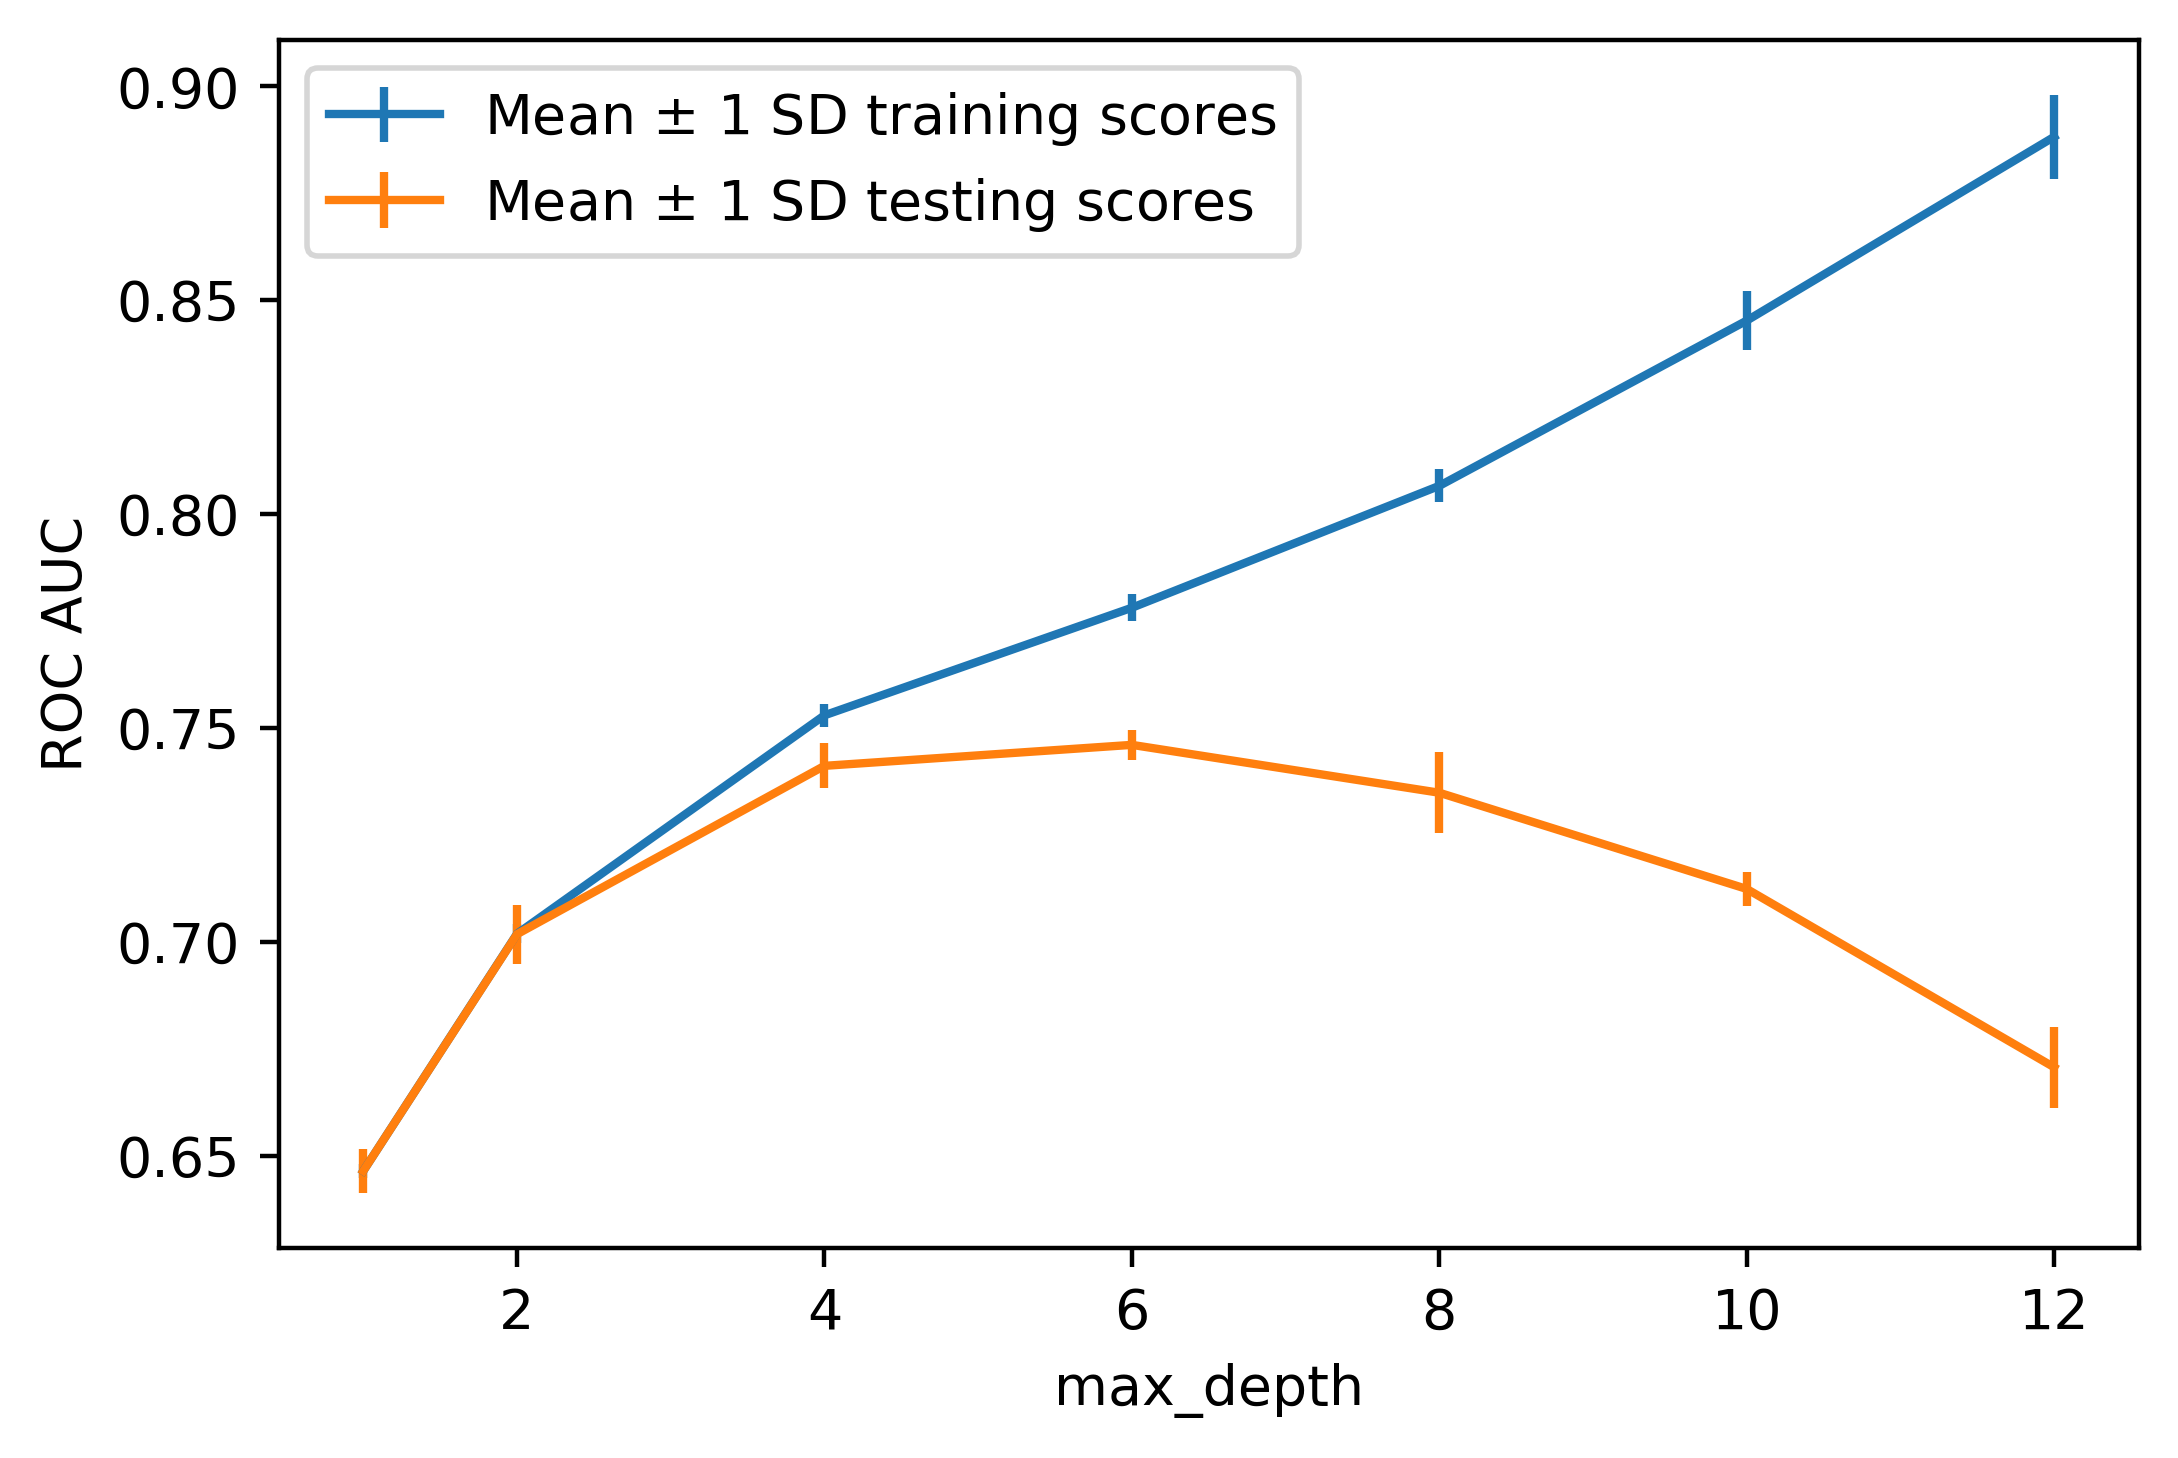

In [ ]:
# Execute the following code to create an error bar plot of training and testing scores for each value of max_depth that was examined in cross-validation
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

The standard deviations of the training and testing scores are shown as vertical lines at each value of max_depth that was tried; the distance above and below the average score is 1 standard deviation. Whenever making error bar plots, it's best to ensure that the units of the error measurement are the same as the units of the y axis. In this case they are, since standard deviation has the same units as the underlying data, as opposed to variance, for example, which has squared units.<br>
The error bars indicate how variable the scores are across folds. If there was a large amount of variation across the folds, it would indicate that the nature of the data across the folds was different in a way that affected the ability of our model to describe it. This could be concerning because it would indicate that we may not have enough data to train a model that would reliably perform on new data. However, in our case here, there is not much variability between the folds, so this is not an issue.

In [ ]:
cv_results_df.max()

mean_fit_time          0.234719
std_fit_time           0.002844
mean_score_time        0.004195
std_score_time         0.000786
param_max_depth       12.000000
split0_test_score      0.745252
split1_test_score      0.746394
split2_test_score      0.751093
split3_test_score      0.743731
mean_test_score        0.746024
std_test_score         0.009521
rank_test_score        7.000000
split0_train_score     0.887852
split1_train_score     0.903375
split2_train_score     0.885509
split3_train_score     0.876034
mean_train_score       0.888193
std_train_score        0.009819
dtype: float64

<b>Fitting a Random Forest</b>

In [ ]:
# Use a RandomForestClassifier pkg from sklearn
from sklearn.ensemble import RandomForestClassifier

# Instantiate the class using these options
rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=3,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)

For this step, we'll use mainly the default options. However, note that we will set max_depth = 3. Here, we are only going to explore the effect of using different numbers of trees, which we will illustrate with relatively shallow trees for the sake of shorter runtimes. To find the best model performance, we'd typically try more and deeper depths of trees.

In [ ]:
# Create a parameter grid for this exercise in order to search the numbers of trees ranging from 10 to 100
rf_params_ex = {'n_estimators':list(range(10,110,10))}

Instantiate a grid search cross-validation object for the random forest model using the parameter grid from the previous step. Otherwise, you can use the same options that were used for the cross-validation of the decision tree

In [ ]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',
                        n_jobs=None, refit=True, cv=4, verbose=1,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [ ]:
# Fit the cross-validation object as follows!
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   32.2s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [ ]:
# Assign the data results into new variable!
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
cv_rf_ex_results_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.142615,0.007759,0.007391,0.000186,10,{'n_estimators': 10},0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,10,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,0.266565,0.003541,0.010862,0.000204,20,{'n_estimators': 20},0.745612,0.753712,0.777616,0.771737,0.762169,0.012998,9,0.772819,0.771499,0.765944,0.765395,0.768914,0.003284
2,0.394253,0.005966,0.015371,0.001198,30,{'n_estimators': 30},0.747259,0.754154,0.777954,0.771825,0.762798,0.012524,7,0.774655,0.772100,0.765026,0.766697,0.769620,0.003910
3,0.520479,0.002761,0.017792,0.000271,40,{'n_estimators': 40},0.746682,0.754553,0.777709,0.773134,0.763020,0.012813,4,0.774300,0.772642,0.765051,0.765876,0.769467,0.004057
4,0.658592,0.004608,0.021893,0.000958,50,{'n_estimators': 50},0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,1,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
5,0.787933,0.003728,0.026279,0.002017,60,{'n_estimators': 60},0.748437,0.755604,0.779478,0.770978,0.763624,0.012252,2,0.775419,0.773615,0.766133,0.767032,0.770550,0.004031
6,0.926789,0.005683,0.028426,0.000205,70,{'n_estimators': 70},0.747491,0.754465,0.779104,0.771023,0.763021,0.012620,3,0.774420,0.773379,0.765960,0.766174,0.769983,0.003934
7,1.058328,0.002449,0.032980,0.000503,80,{'n_estimators': 80},0.747424,0.754488,0.778753,0.770872,0.762884,0.012502,5,0.774234,0.773257,0.765978,0.766220,0.769922,0.003840
8,1.185140,0.008885,0.035828,0.000425,90,{'n_estimators': 90},0.747097,0.753794,0.778507,0.770426,0.762456,0.012571,8,0.774095,0.772973,0.766022,0.765748,0.769709,0.003846
9,1.309610,0.006003,0.039704,0.000474,100,{'n_estimators': 100},0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,6,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750


Here, we've used plt.subplots to create two axes at once, within a figure, in a one-row-by-two-column configuration. We then access the axes objects by indexing the array of axs axes returned from this operation, to create plots.

In [ ]:
# Search the max!
cv_rf_ex_results_df.max()

mean_fit_time           1.309610
std_fit_time            0.008885
mean_score_time         0.039704
std_score_time          0.002017
param_n_estimators    100.000000
split0_test_score       0.748437
split1_test_score       0.755878
split2_test_score       0.779478
split3_test_score       0.773134
mean_test_score         0.763651
std_test_score          0.014656
rank_test_score        10.000000
split0_train_score      0.775419
split1_train_score      0.774025
split2_train_score      0.766133
split3_train_score      0.767032
mean_train_score        0.770550
std_train_score         0.004191
dtype: float64

Your results may be different due to the differences in the platform or if you set a different random seed.<br>
There are several things to note about these visualizations. First of all, we can see that by using a random forest, we have increased model performance on the cross-validation testing folds above that of any of our previous efforts. While we haven't made an attempt to tune the random forest hyperparameters to achieve the best model performance we can, this is a promising result and indicates that a random forest will be a valuable addition to our modeling efforts.<br><br>
So, what about the other questions that we set out to explore with this visualization? We are interested in seeing how long it takes to fit random forest models with various numbers of trees, and what the gains in model performance are from using more trees.

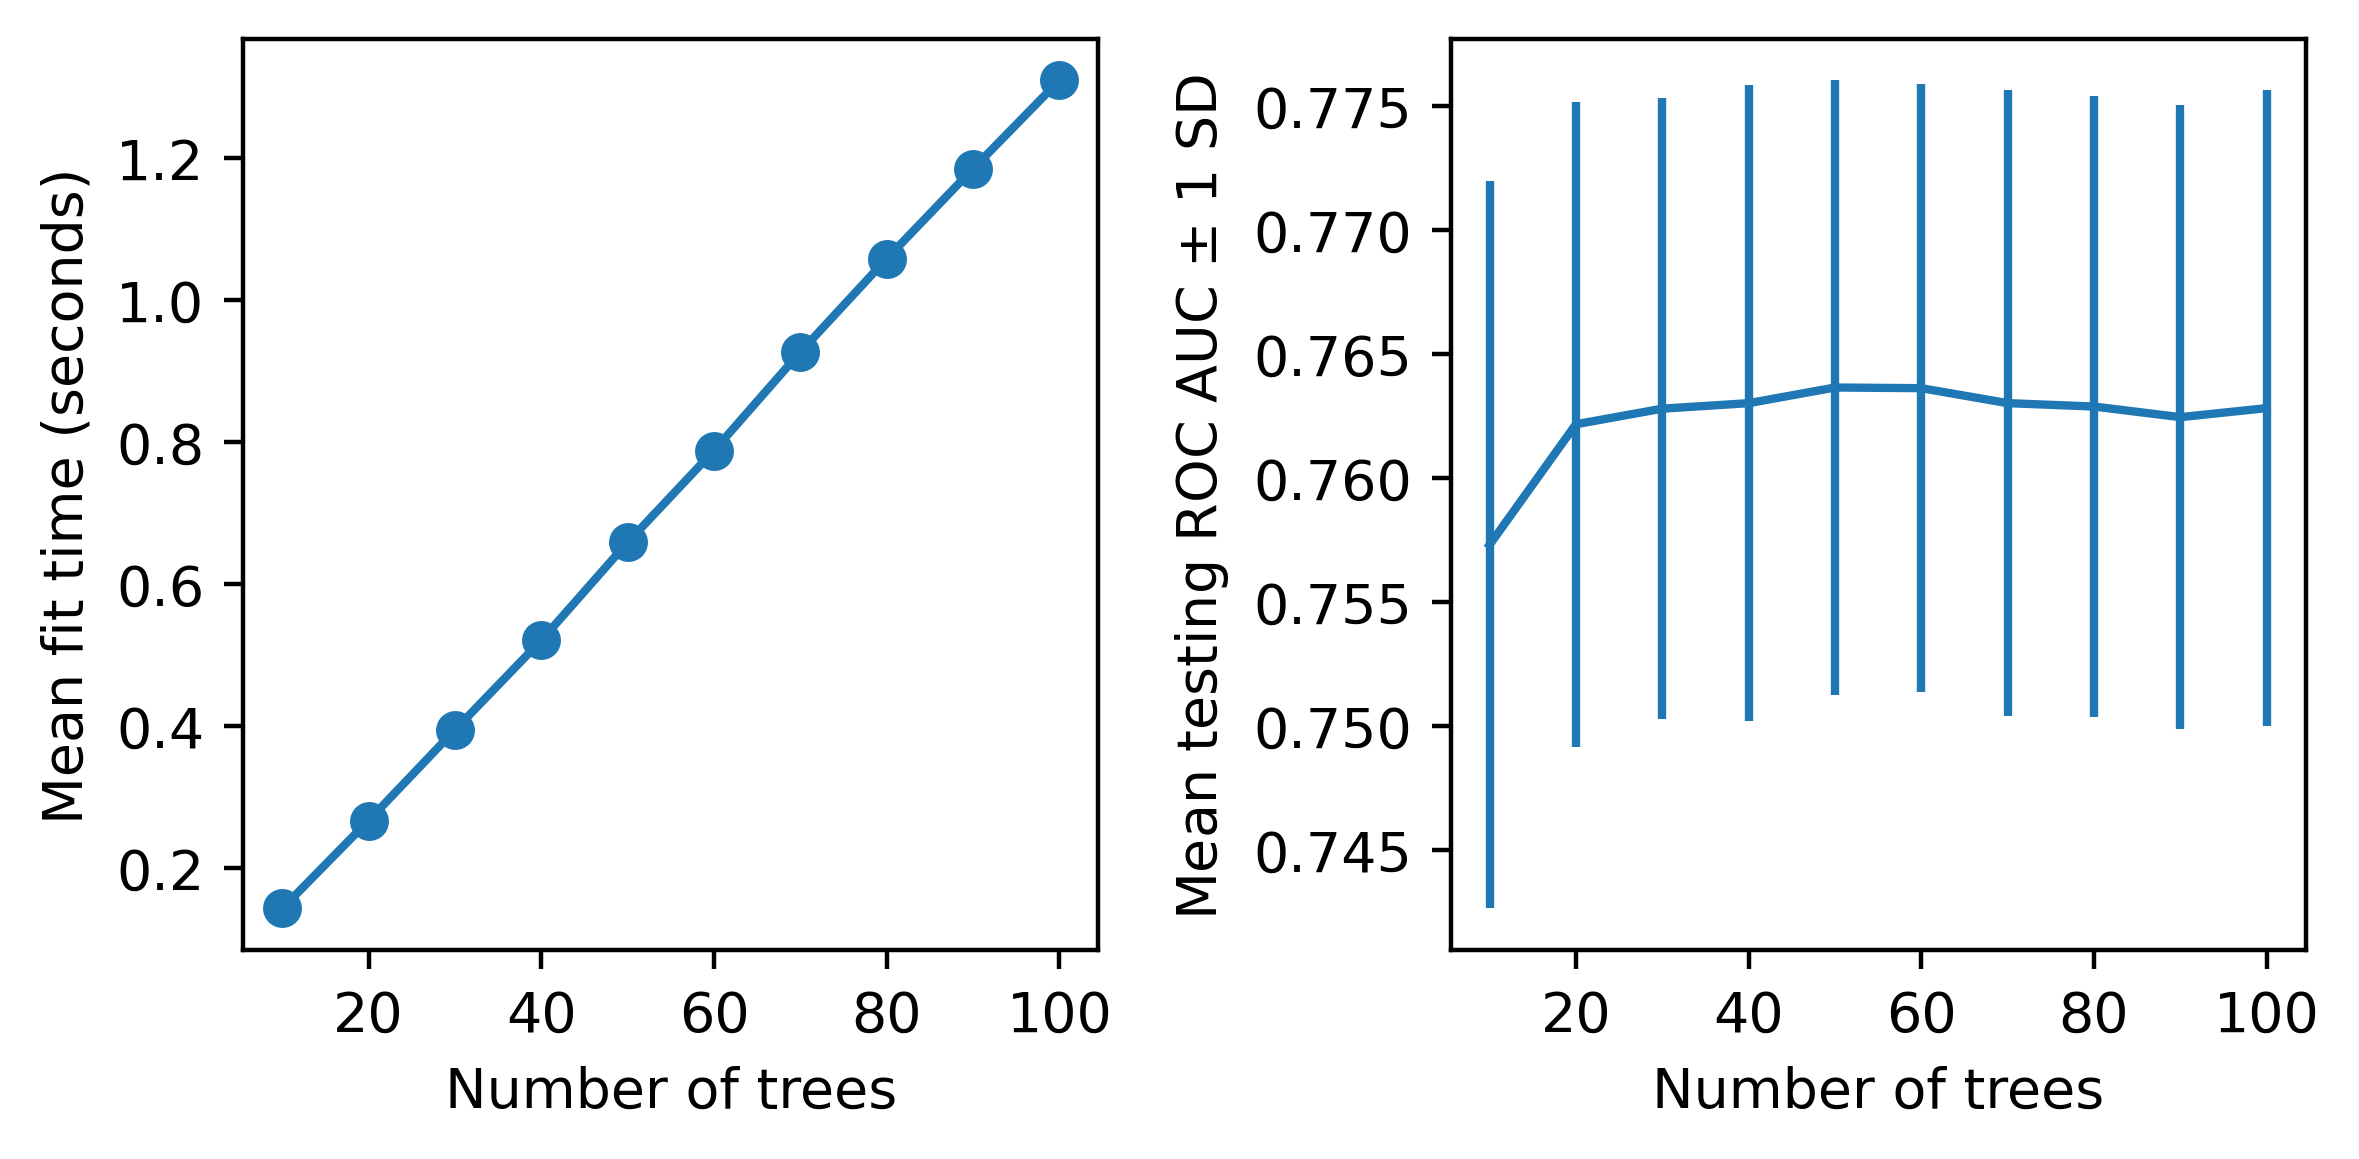

In [ ]:
# Create two subplots, of the mean time and mean testing scores with standard deviation
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

Here, "best" just means the hyperparameters that resulted in the highest average model testing score.

In [ ]:
# Use this code to see the best hyperparameters from cross-validation:
cv_rf_ex.best_params_

{'n_estimators': 50}

In [ ]:
# Run this code to create a DataFrame of the feature names and importance, and then show it sorted by importance
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf_ex.best_estimator_.feature_importances_
})

# Sort!
print(feat_imp_df.sort_values('Importance', ascending=False))

   Feature name  Importance
4         PAY_1    0.609609
11     PAY_AMT1    0.094123
0     LIMIT_BAL    0.079265
13     PAY_AMT3    0.047067
12     PAY_AMT2    0.035393
6     BILL_AMT2    0.022422
14     PAY_AMT4    0.021164
15     PAY_AMT5    0.015962
10    BILL_AMT6    0.014293
8     BILL_AMT4    0.013454
7     BILL_AMT3    0.013321
16     PAY_AMT6    0.011831
9     BILL_AMT5    0.011264
5     BILL_AMT1    0.008574
1     EDUCATION    0.001630
3           AGE    0.000459
2      MARRIAGE    0.000170


<b>CHECKERBOARD GRAPH</b><br><br>
Before moving on to the Activity, we illustrate a visualization technique in Matplotlib. Plotting a two-dimensional grid with colored squares or other shapes on it, can be useful when you want to show three dimensions of data. Here, color illustrates the third dimension. For example, you may want to visualize model testing scores over a grid of two hyperparameters. This is, in fact, the use case in Activity 5, Cross-Validation Grid Search with Random Forest.<br>
The first step in the process is to create grids of x and y coordinates. The NumPy meshgrid function can be used to do this. This function takes one-dimensional arrays of x and y coordinates and creates the mesh grid with all the possible pairs from both. The points in the mesh grid will be the corners of the checkerboard plot. Here is how the code looks for a 4 x 4 grid of colored patches. Since we are specifying the corners, we need a 5 x 5 grid of points.

In [ ]:
xx_example, yy_example = np.meshgrid(range(5), range(5))
print(xx_example)
print(yy_example)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


The grid of data to plot on this mesh should also have a square shape. We take one-dimensional array of integers between 1 and 16, and reshape it to a two-dimensional, 4 x 4 grid

In [ ]:
z_example = np.arange(1,17).reshape(4,4)
z_example

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

Text(0, 0.5, 'Y coordinate')

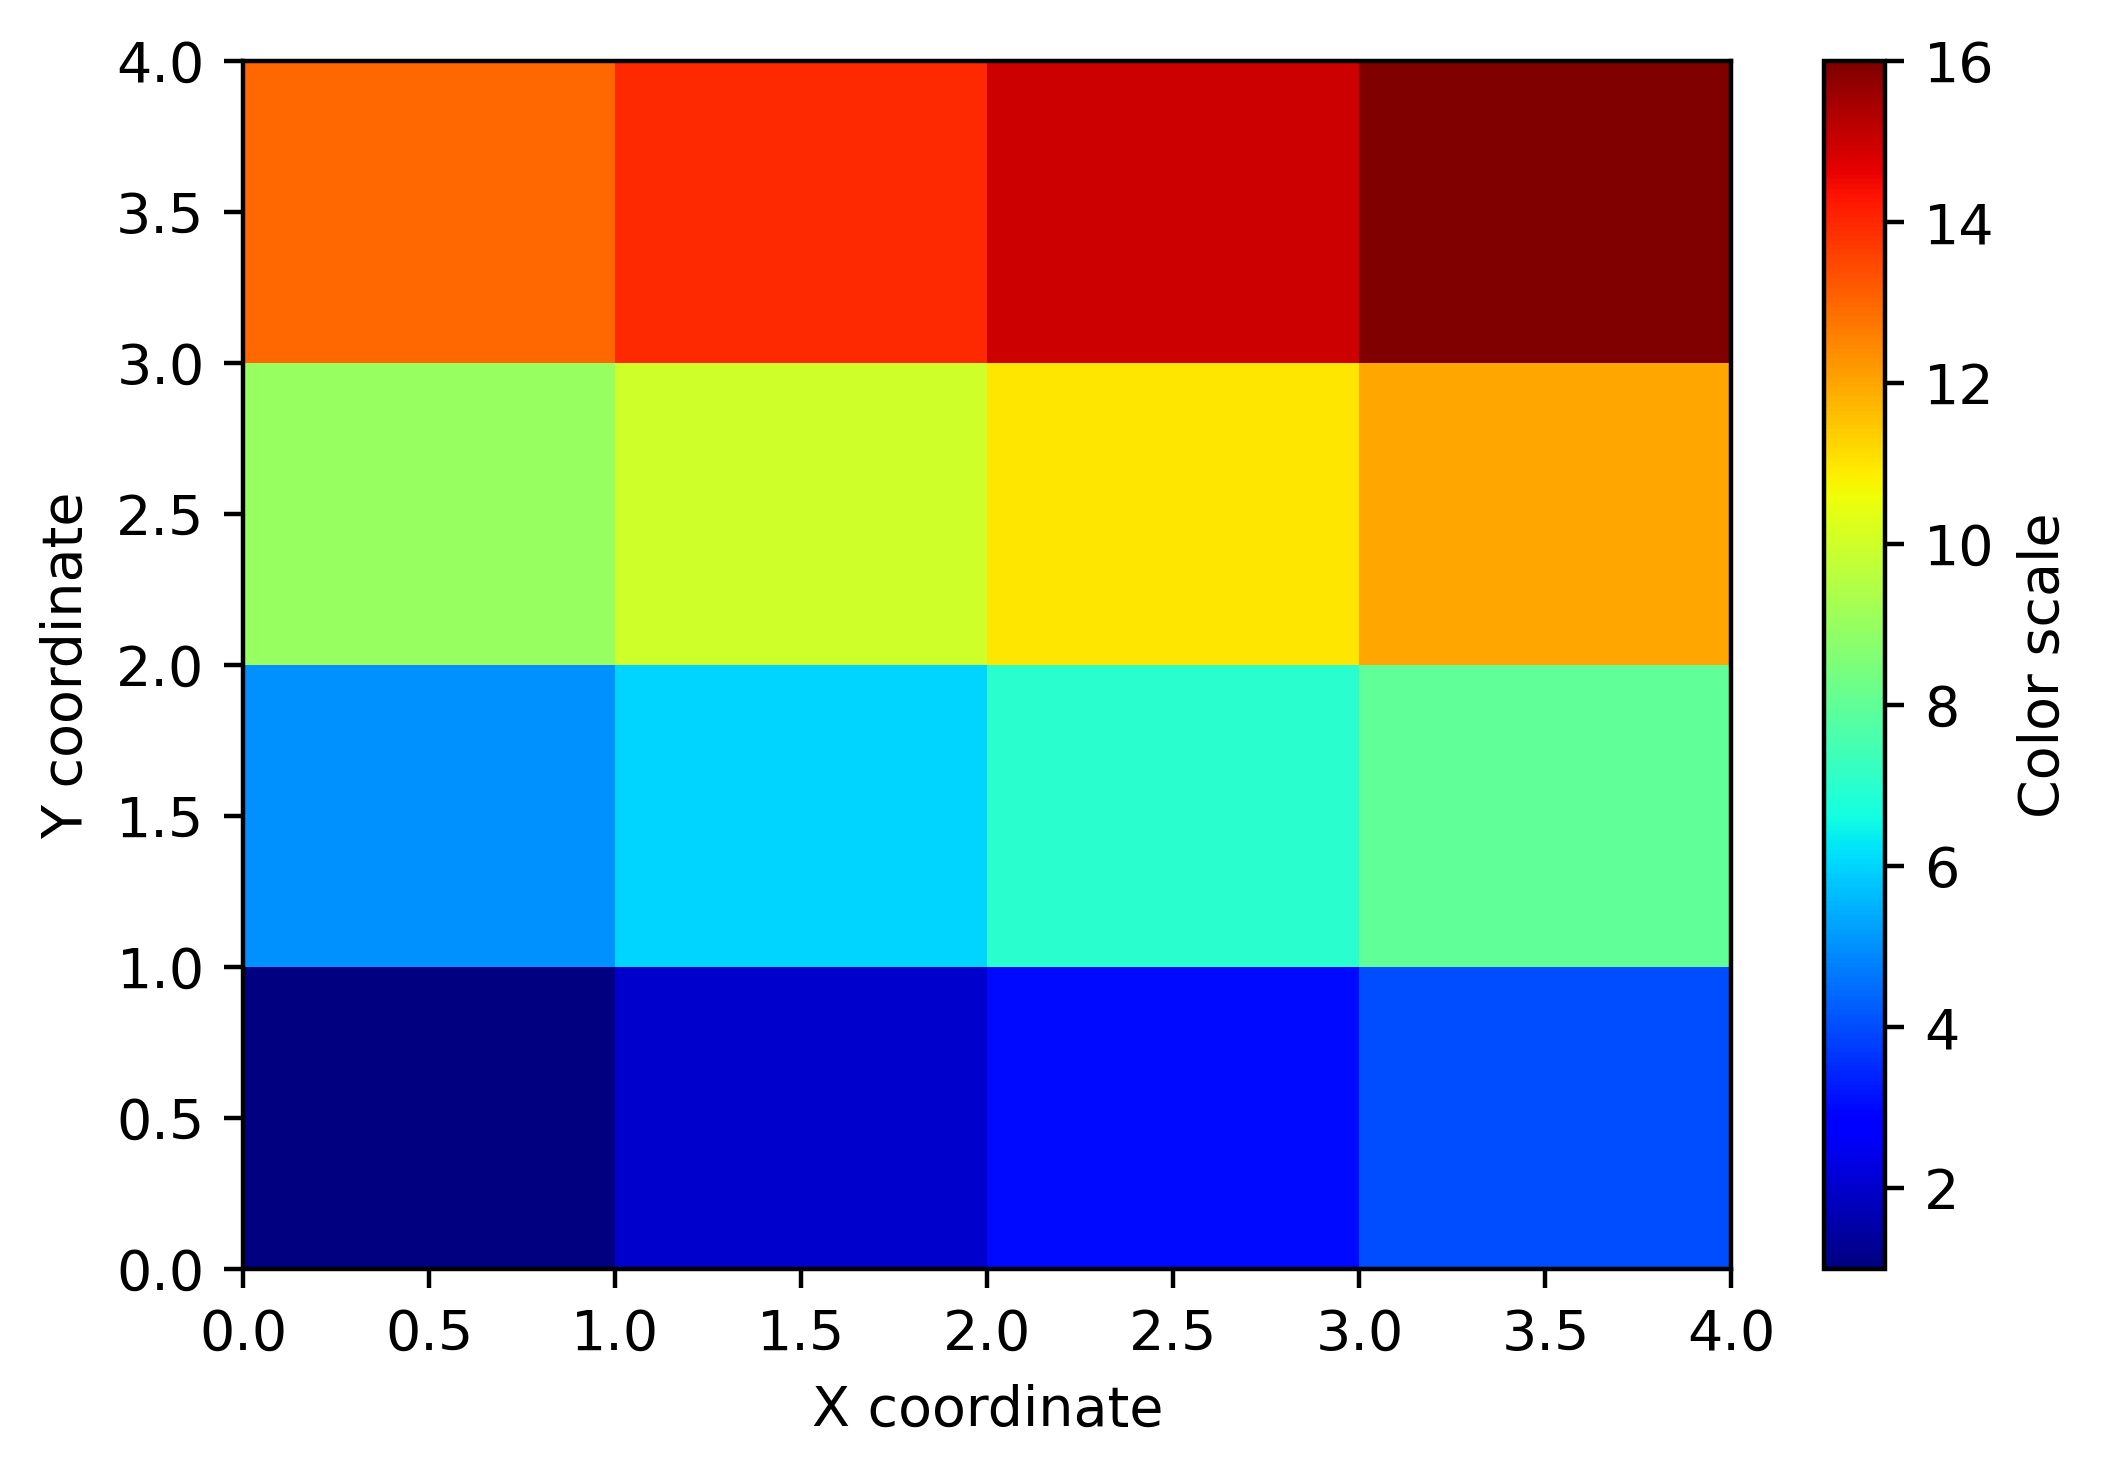

In [ ]:
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

<b>Cross-Validation Grid Search with Random Forest</b><br><br>
In this activity, you will conduct a grid search over the number of trees in the forest (n_estimators) and the maximum depth of a tree (max_depth) for a random forest model on the case study data. You will then create a visualization showing the average testing score for the grid of hyperparameters that you searched over. Perform the following steps to complete the activity.

1. Create a dictionary representing the grid for the max_depth and n_estimators hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees. Leave the other hyperparameters at their defaults.
2. Instantiate a GridSearchCV object using the same options that we have previously in this chapter, but with the dictionary of hyperparameters created in step 1 here. Set verbose=2 to see the output for each fit performed. You can reuse the same random forest model object rf that we have been using.
3. Fit the GridSearchCV object on the training data.
4. Put the results of the grid search in a pandas DataFrame.
5. Create a pcolormesh visualization of the mean testing score for each combination of hyperparameters.
6. Conclude which set of hyperparameters to use.


In [ ]:
rf_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

In [ ]:
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='roc_auc',
                  n_jobs=-1, refit=True, cv=4, verbose=2,
                  error_score=np.nan, return_train_score=True)

In [ ]:
cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  2.0min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [ ]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)
cv_rf_results_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.210681,0.000629,0.011240,0.000427,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,15,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,0.979983,0.010634,0.034130,0.000693,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,12,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
2,1.950913,0.006082,0.062569,0.000584,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,13,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750
3,3.938504,0.020476,0.119318,0.001836,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747454,0.753057,0.777644,0.771729,0.762471,0.012550,14,0.774453,0.773534,0.766139,0.767404,0.770382,0.003653
4,0.338154,0.004328,0.011983,0.000162,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.752905,0.758904,0.780036,0.774017,0.766466,0.010980,11,0.795911,0.796476,0.793695,0.796446,0.795632,0.001141
5,1.670869,0.016327,0.039575,0.000805,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.760089,0.765251,0.788567,0.778669,0.773144,0.011193,8,0.807081,0.805109,0.799176,0.801229,0.803149,0.003113
6,3.395087,0.055468,0.081152,0.005304,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.760964,0.765515,0.788793,0.778936,0.773552,0.011004,7,0.808194,0.806130,0.800846,0.803123,0.804573,0.002808
7,6.705983,0.065267,0.145921,0.001571,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.761481,0.765319,0.787854,0.779745,0.773600,0.010682,6,0.808276,0.806853,0.800682,0.804006,0.804954,0.002906
8,0.469184,0.003682,0.013682,0.000296,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.757853,0.755444,0.781544,0.773823,0.767166,0.010899,10,0.854161,0.856197,0.850317,0.852039,0.853178,0.002211
9,2.313834,0.026036,0.048969,0.001099,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.763956,0.764420,0.786690,0.780255,0.773830,0.009908,4,0.867242,0.871380,0.868213,0.867390,0.868557,0.001672


In [ ]:
cv_rf_results_df.max()

mean_fit_time          11.406010
std_fit_time            0.065267
mean_score_time         0.211354
std_score_time          0.005304
param_max_depth        12.000000
param_n_estimators    200.000000
split0_test_score       0.765910
split1_test_score       0.767541
split2_test_score       0.790255
split3_test_score       0.783513
mean_test_score         0.776199
std_test_score          0.014656
rank_test_score        16.000000
split0_train_score      0.945018
split1_train_score      0.949378
split2_train_score      0.946415
split3_train_score      0.944689
mean_train_score        0.946375
std_train_score         0.004263
dtype: float64

Text(0, 0.5, 'Maximum depth')

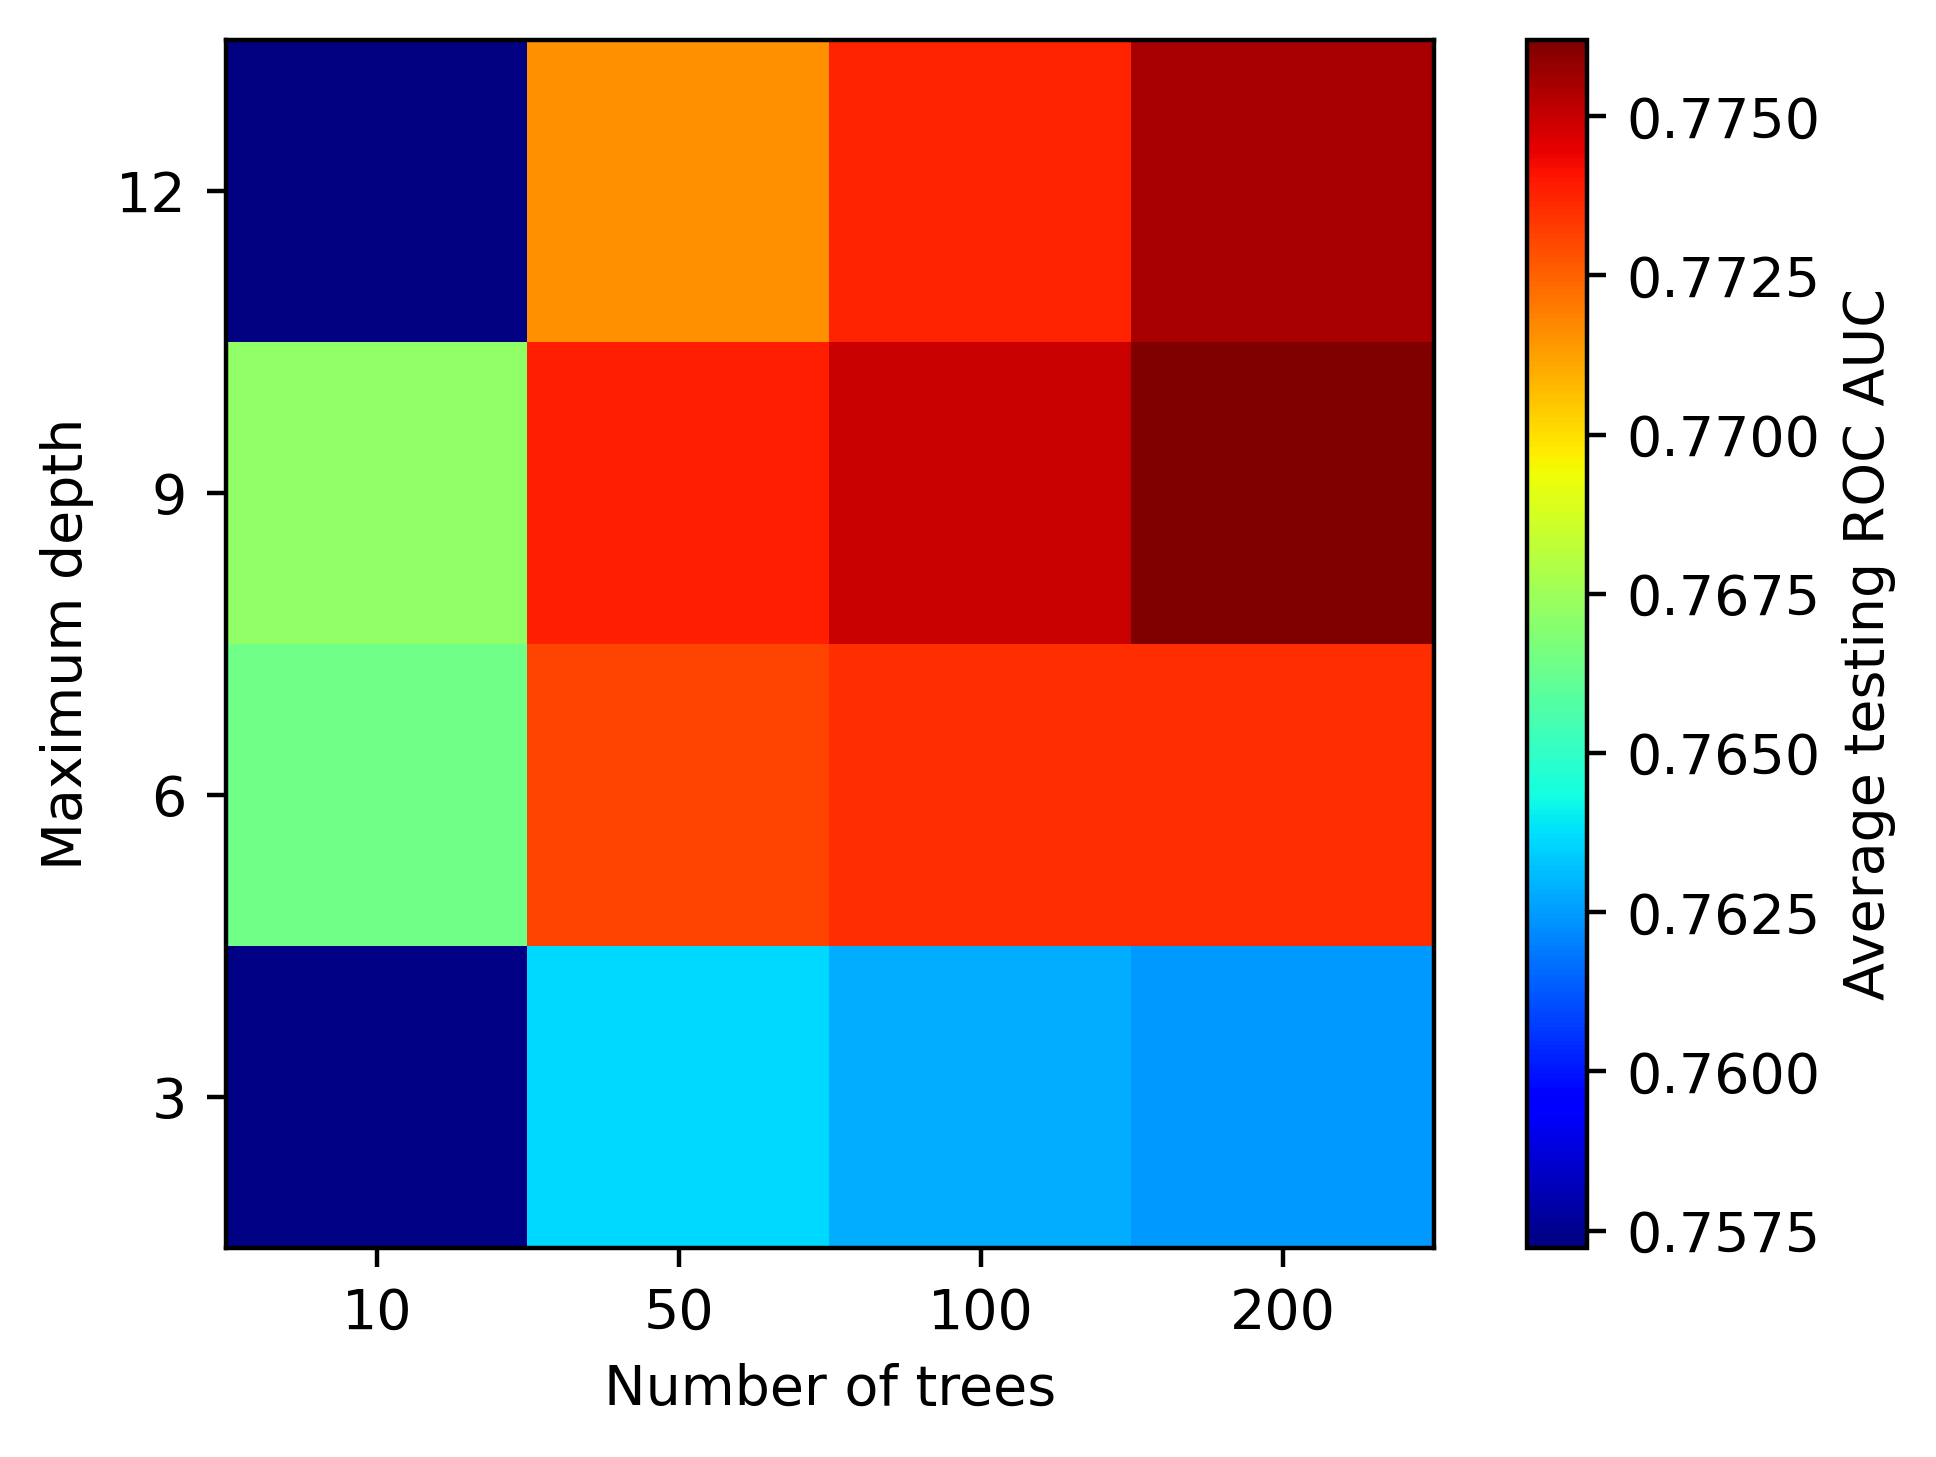

In [ ]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))
cm_rf = plt.cm.jet

ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_results_df['mean_test_score'].values.reshape((4,4)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

In [ ]:
print(cv_rf.best_params_)

{'max_depth': 9, 'n_estimators': 200}


In [ ]:
feat_imp_df_act = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf.best_estimator_.feature_importances_
})

In [ ]:
feat_imp_df_act.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.437439
0,LIMIT_BAL,0.059961
11,PAY_AMT1,0.059434
12,PAY_AMT2,0.045518
13,PAY_AMT3,0.043299
5,BILL_AMT1,0.042195
6,BILL_AMT2,0.041562
7,BILL_AMT3,0.037268
14,PAY_AMT4,0.034321
8,BILL_AMT4,0.034123
